In [35]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

In [36]:
data_in = './data_in'
data_out = './data_out'
data_prefix = 'novels'

In [37]:
#OHCO = ['book', 'chapter', 'para_num', 'sent_num', 'token_num']
#PARA = OHCO[:4] # Paragraphs
#SENT = OHCO[:5] # Sentences
#BAG = PARA


OHCO = ['president', 'speech_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2] # Speeches
BOOKS = OHCO[:1] # Presidents


BAG = CHAPS
# BAG = SENT

In [38]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50,
    workers = 4
)

In [39]:
TOKENS = pd.read_csv('TOKEN.csv')#.set_index(OHCO)
VOCAB = pd.read_csv('VOCAB.csv')
LIB = pd.read_csv('LIB.csv')

In [40]:
TOKENS= TOKENS.set_index(OHCO)
LIB = LIB.set_index('president')

In [41]:
LIB

,Unnamed: 0,speech_id,speech_title,src_file
president,,,,
hclinton,0,HClinton_2016_07_28,Hillary Clinton delivers remarks at the 2016 D...,./Total_Corpus of Presidential Speeches/HClint...
hclinton,1,HClinton_2016_07_29,Democratic presidential candidate Hillary Clin...,./Total_Corpus of Presidential Speeches/HClint...
hclinton,2,HClinton_2016_08_01,"Hillary Clinton (D), Presidential Candidate, R...",./Total_Corpus of Presidential Speeches/HClint...
hclinton,3,HClinton_2016_08_05,Hillary Clinton delivers remarks at the Nation...,./Total_Corpus of Presidential Speeches/HClint...
hclinton,4,HClinton_2016_08_10,Hillary Clinton holds a campaign rally in Des ...,./Total_Corpus of Presidential Speeches/HClint...
...,...,...,...,...
wilson - D,1075,wilson_speeches_027,Wilson&#8217;s Fourteen Points,./Total_Corpus of Presidential Speeches/wilson...
wilson - D,1076,wilson_speeches_028,Sixth Annual Message,./Total_Corpus of Presidential Speeches/wilson...
wilson - D,1077,wilson_speeches_029,Fifth Annual Message,./Total_Corpus of Presidential Speeches/wilson...


In [42]:
TOKENS

pos_tuple  \
president speech_id           para_num sent_num token_num                         
hclinton  HClinton_2016_07_28 0        0        0          ('<CLINTON:>', 'JJ')   
                                                1              ('Thank', 'NNP')   
                                                2                ('you!', 'NN')   
                                       1        0              ('Thank', 'NNP')   
                                                1                ('you!', 'NN')   
...                                                                         ...   
wilson    wilson_speeches_031 18       1        28            ('whether', 'IN')   
                                                29                 ('in', 'IN')   
                                                30           ('America', 'NNP')   
                                                31                 ('or', 'CC')   
                                                32         ('elsewhere.', 'VB')   

                                                           pos   token_str  \
president speech_id           para_num sent_num token_num                    
hclinton  HClinton_2016_07_28 0        0        0           JJ  <CLINTON:>   
                                                1          NNP       Thank   
                                                2           NN        you!   
                                       1        0          NNP       Thank   
                                                1           NN        you!   
...                                                        ...         ...   
wilson    wilson_speeches_031 18       1        28          IN     whether   
                                                29          IN          in   
                                                30         NNP     America   
                                                31          CC          or   
                                                32          VB  elsewhere.   

                                                            term_str  
president speech_id           para_num sent_num token_num             
hclinton  HClinton_2016_07_28 0        0        0            clinton  
                                                1              thank  
                                                2                you  
                                       1        0              thank  
                                                1                you  
...                                                              ...  
wilson    wilson_speeches_031 18       1        28           whether  
                                                29                in  
                                                30           america  
                                                31                or  
                                                32         elsewhere  

[3311842 rows x 4 columns]

In [43]:
DOCS = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [44]:
LIB.loc['hclinton'].shape

(36, 4)

In [45]:
LIB = LIB.loc['hclinton']

In [46]:
#TOKENS.loc['hclinton']

In [47]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [48]:

#LIB2 = LIB[LIB['author'] == 'melville']
TRUMP = TOKENS.loc['hclinton']
#melville = TOKENS.loc[LIB2.index]

In [49]:
POS = ["NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
LIB = TRUMP[TRUMP["pos"].isin(POS)]

In [50]:
OHCO = ['speech_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2] # 
BOOKS = OHCO[:1] # speech


BAG = BOOKS

In [51]:
POS = ["NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
LIB = TRUMP[TRUMP["pos"].isin(POS)]
DOCS = TRUMP\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [52]:
DOCS = [doc for doc in DOCS if len(doc) > 1] 
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [53]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index], 
        term_str = model.wv.index_to_key    # 
    )).set_index('term_str')

In [54]:
tsne_engine = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(coords.vector.to_list())

In [55]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

In [56]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [57]:
coords = coords[coords.stop == 0]


In [58]:
coords = coords.dropna()

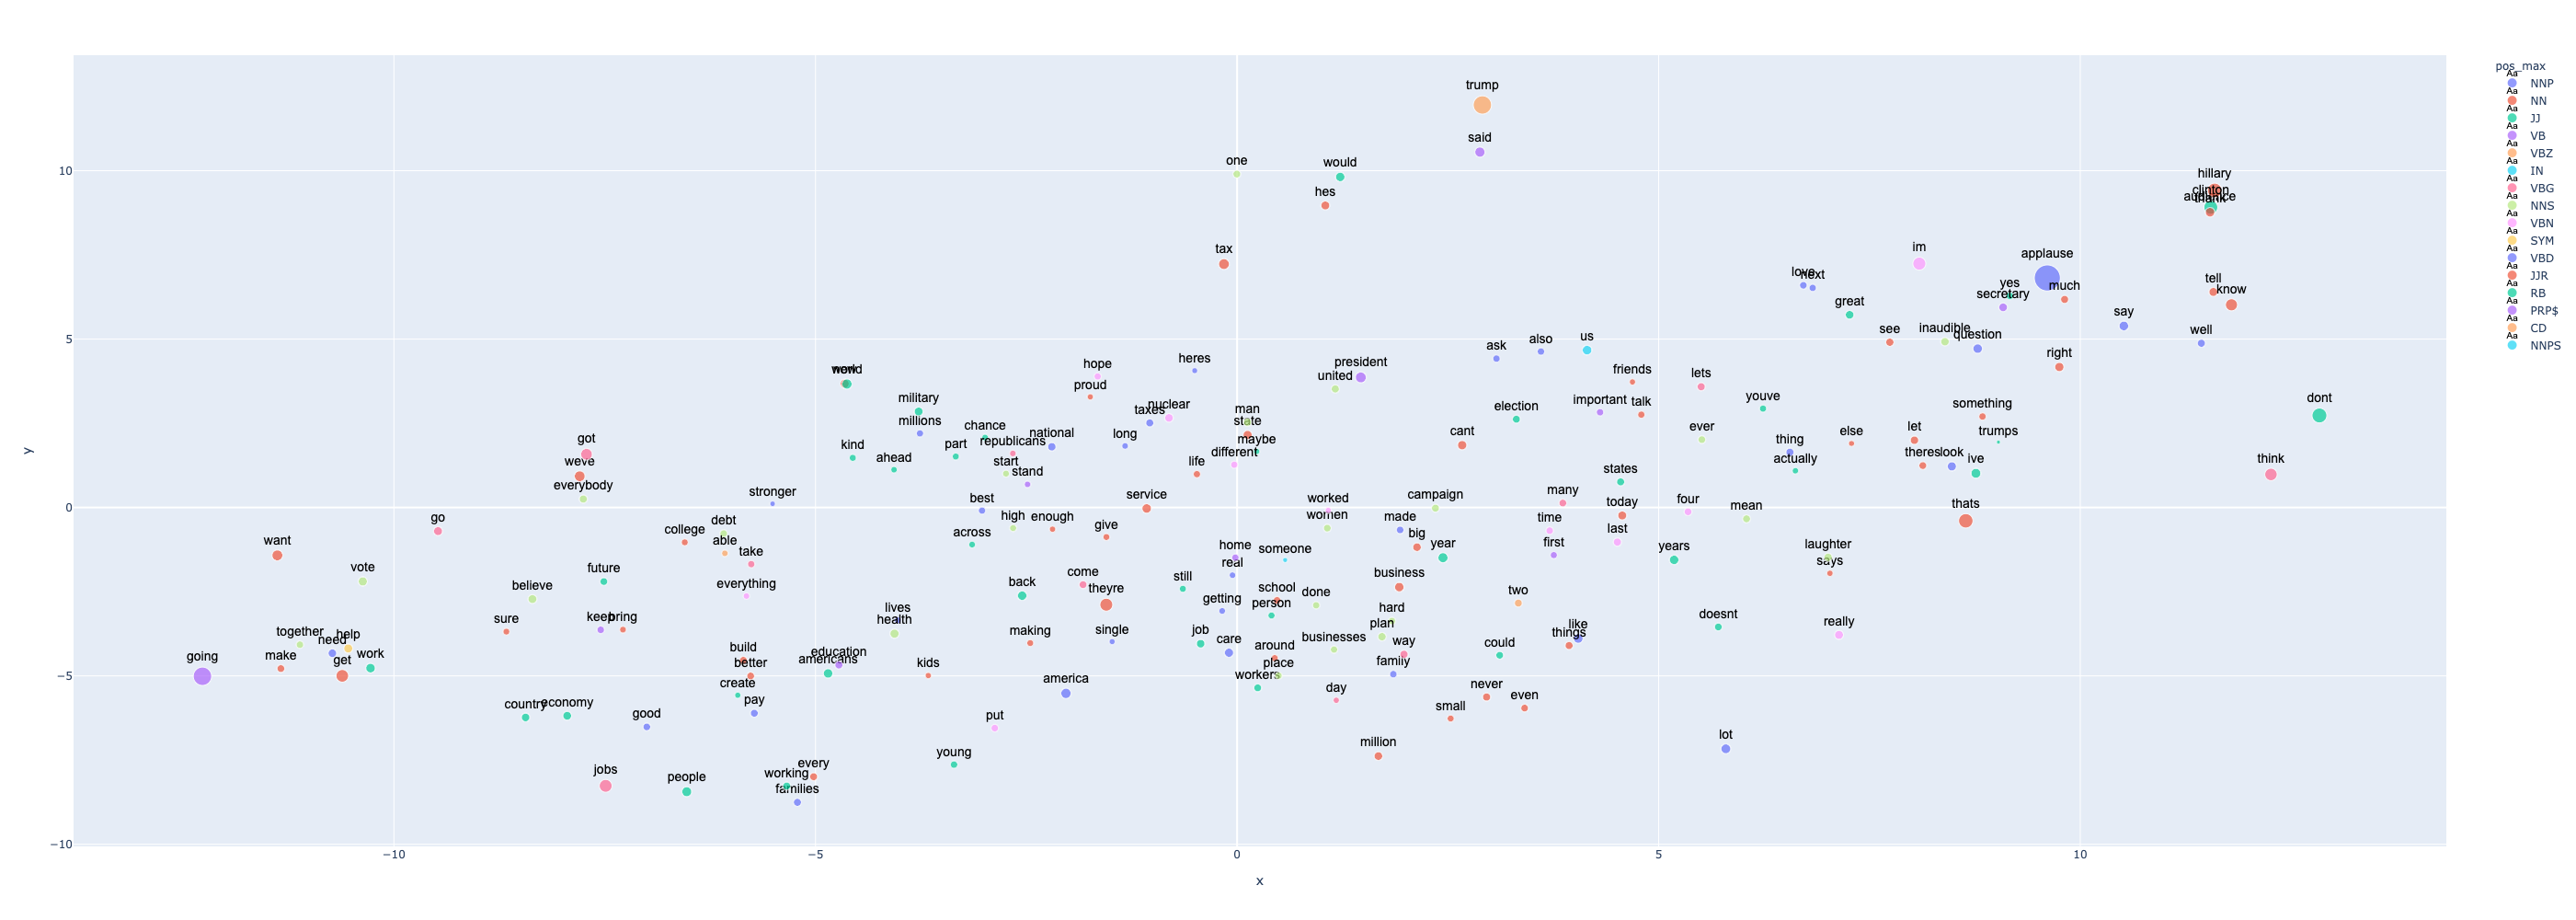

In [59]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_max', 
           hover_name='term_str',          
           size='tfidf_sum_speech_max',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

## Semantic Algebra

### Analogies

$A : B :: C : D? \rightarrow B - A + C = D$


In [60]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [61]:
complete_analogy('men', 'smart', 'women', 10)

Error: "Key 'smart' not present"


In [62]:
complete_analogy('man', 'boy', 'woman', 10)

Error: "Key 'boy' not present"


In [63]:
complete_analogy('man', 'rich', 'woman', 10)

Error: "Key 'rich' not present"


In [64]:
complete_analogy('man', 'smart', 'woman', 10)

Error: "Key 'smart' not present"


### Similarites

In [65]:
get_most_similar('smart')

KeyError: "Key 'smart' not present"

In [66]:
get_most_similar('man')

,term,sim
0,last,0.998864
1,two,0.998795
2,over,0.998706
3,time,0.998644
4,today,0.998609
5,which,0.998507
6,after,0.998491
7,same,0.998375
8,state,0.998371
9,before,0.998319


In [67]:
get_most_similar('women')

,term,sim
0,never,0.998076
1,workers,0.998069
2,made,0.997867
3,place,0.997742
4,support,0.997615
5,plan,0.997609
6,businesses,0.997597
7,against,0.997468
8,into,0.997326
9,care,0.997324


In [68]:
get_most_similar('deplorable')

KeyError: "Key 'deplorable' not present"

In [69]:
get_most_similar('women')

,term,sim
0,never,0.998076
1,workers,0.998069
2,made,0.997867
3,place,0.997742
4,support,0.997615
5,plan,0.997609
6,businesses,0.997597
7,against,0.997468
8,into,0.997326
9,care,0.997324


In [70]:
get_most_similar(positive=['man'], negative=['women'])

,term,sim
0,hillary,0.617776
1,clinton,0.563716
2,thank,0.497308
3,audience,0.458198
4,NaN,0.440812
5,you,0.351080
6,tell,0.307952
7,know,0.298683
8,well,0.257501
9,i,0.250901


In [71]:
get_most_similar(positive='women')

,term,sim
0,never,0.998076
1,workers,0.998069
2,made,0.997867
3,place,0.997742
4,support,0.997615
5,plan,0.997609
6,businesses,0.997597
7,against,0.997468
8,into,0.997326
9,care,0.997324


In [72]:
get_most_similar(positive=['women'], negative=['man'])

,term,sim
0,our,0.310583
1,the,0.191000
2,people,0.153150
3,work,0.148218
4,who,0.146619
5,of,0.141958
6,and,0.141292
7,jobs,0.140068
8,get,0.138426
9,country,0.136580


## Save

In [73]:
#W2V = pd.DataFrame(model.wv.vectors_norm, index=model.wv.vocab.keys())
#W2V.to_csv('{}/{}-W2V.csv'.format(data_out, data_prefix))
#pd.Series(DOCS).to_csv('{}/{}-GENSIM_DOCS.csv'.format(data_out, data_prefix), index=False, header=False)

## View with HAC

In [74]:
proper_nouns = 'tommy emily tuppence agnes edmund holmes'.split()
coords2 = coords.loc[~coords.index.isin(proper_nouns), ['vector','stop','tfidf_sum_speech_max','pos_max']]

In [75]:
coords2

,vector,stop,tfidf_sum_speech_max,pos_max
term_str,,,,
applause,"[0.088469855, -0.14085016, 0.08831157, 0.03465...",0,15788.552536,NNP
know,"[0.080712445, -0.114972, 0.07000601, 0.0080359...",0,3367.726805,NN
people,"[0.027415965, -0.17935957, 0.013477978, -0.010...",0,2320.333401,JJ
going,"[0.04487916, -0.20977941, 0.025951017, 0.00477...",0,7828.914181,VB
want,"[0.072072975, -0.15003575, 0.08541678, -0.0069...",0,2761.350164,NN
...,...,...,...,...
proud,"[0.04215247, -0.13719273, 0.035873488, 0.00922...",0,936.260322,NN
single,"[0.037063777, -0.16513546, 0.032669477, 0.0063...",0,889.167632,NNP
millions,"[0.024399504, -0.14225543, 0.024494944, -0.000...",0,1244.231737,NNP


In [76]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def hca(sims, labels, linkage_method='ward', color_thresh=.3):
    tree = sch.linkage(sims, method=linkage_method)
    fig_height = len(labels) / 3
    plt.figure()
    fig, axes = plt.subplots(figsize=(10, fig_height))
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

def plot_terms_tree(coords, terms_n = 100, term_pos_pat = r'^(N|V)', color_thresh=1):
    term_filter = coords.pos_max.str.match(term_pos_pat) & (coords.stop == 0) & (coords.index.str.len() > 2)
    M = coords[term_filter].sort_values('tfidf_sum_speech_max', ascending=False).vector.head(terms_n)
    IDX = coords.loc[M.index].index #term_str
    hca(M.to_list(), IDX.to_list(), color_thresh=color_thresh)

<Figure size 432x288 with 0 Axes>

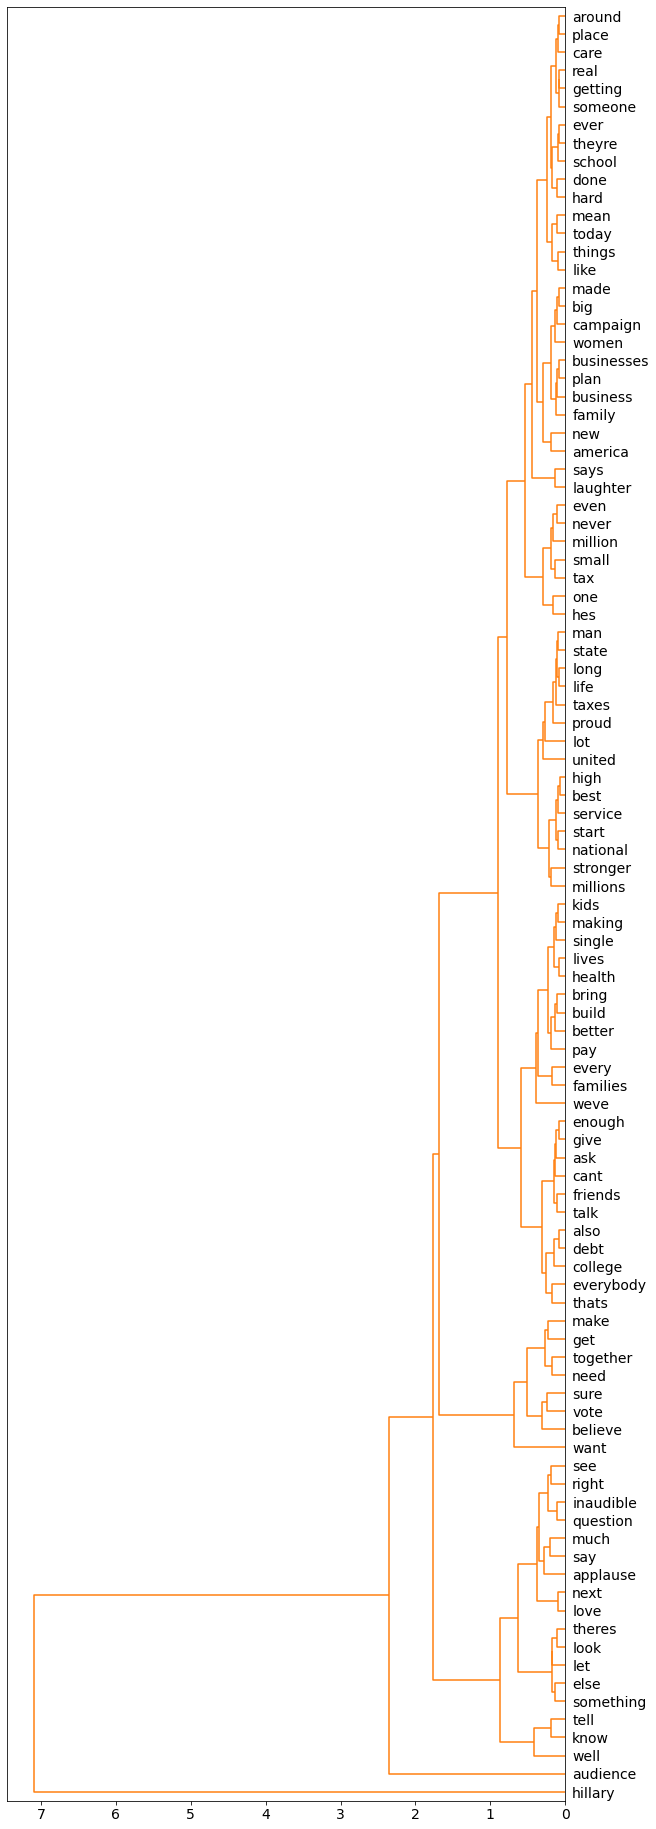

In [77]:
plot_terms_tree(coords2, term_pos_pat=r'^NN[^P]?', color_thresh=9, terms_n=100)

<Figure size 432x288 with 0 Axes>

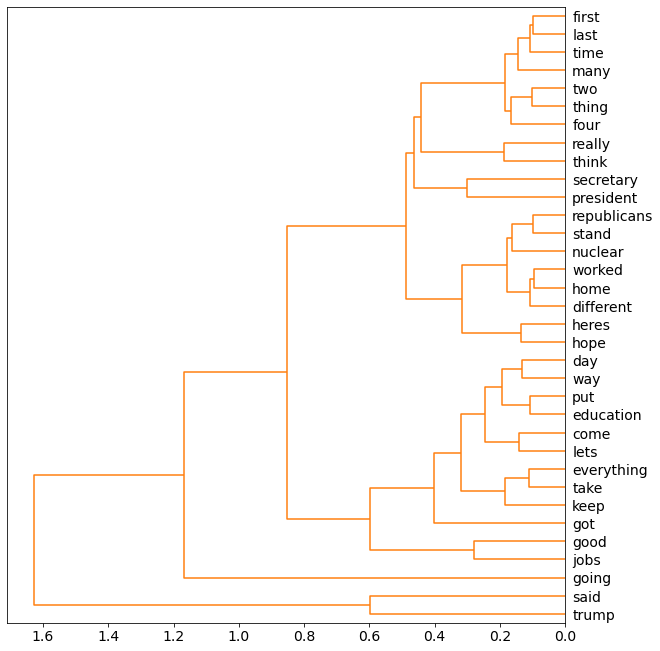

In [79]:
plot_terms_tree(coords2, term_pos_pat=r'^V', color_thresh=8, terms_n=100)

In [ ]:
complete_analogy('us','great','china', 10)

In [ ]:
complete_analogy('america', 'great', 'china', 20)

In [ ]:
complete_analogy('man','job','women', 10)

In [ ]:
complete_analogy('us','great','mexico', 10)

In [ ]:
complete_analogy('us','great','russia', 10)

In [ ]:
complete_analogy('woman', 'home', 'man', 10)